###Optimizer customization

By default Keras use Adam optimizer with learning rate 0.00001.
If you would like to change to another algorithm this is possible too.


In [2]:
import os
import sys
#pip loguru
from loguru import logger
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress TensorFlow logging (1)

Remove default logger definition

In [3]:
logger.remove()  # Remove the default logger
logger.add(sys.stdout, level="INFO")  # Add a new logger that outputs to stderr

1

Import libriaries

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

Prepare data

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Define model

In [6]:
def model_fn(optimizer=None):
  model =  Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
  ])
  if optimizer is None:
    model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  else:
    model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

Train model

In [7]:
def fit_model(model, x_train, y_train, epochs=5, batch_size=32, verbose=0):
  logger.info("Training the model...")
  history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
  logger.debug(f"Model summary: {history.history}")
  return history

Train model by default values

In [8]:
model = model_fn()
default_history = fit_model(model, x_train, y_train, epochs=5, verbose=0)

2025-03-31 19:19:23.305 | INFO     | __main__:fit_model:2 - Training the model...


C:\Users\ebliacher.CORPORATE\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


***Let`s define custom optimazer***

In [14]:

optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
model = model_fn(optimizer=optimizer)
adam_with_changed_rate = fit_model(model, x_train, y_train, epochs=5, verbose=0)

2025-03-31 19:22:12.190 | INFO     | __main__:fit_model:2 - Training the model...


C:\Users\ebliacher.CORPORATE\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model = model_fn(optimizer=optimizer)
sgd = fit_model(model, x_train, y_train, epochs=5, verbose=0)

2025-03-31 19:20:08.606 | INFO     | __main__:fit_model:2 - Training the model...


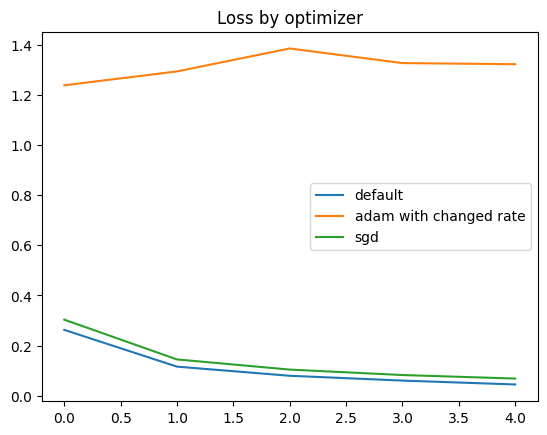

In [15]:
plt.plot(default_history.history['loss'], label='default')
plt.plot(adam_with_changed_rate.history['loss'], label='adam with changed rate')
plt.plot(sgd.history['loss'], label='sgd')
plt.title('Loss by optimizer')
plt.legend()